In [98]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#read train data
train_data=pd.read_csv(r"E:\ml_ai_ict\competition\train_v9rqX0R.csv")

In [100]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [102]:
#checking null
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [103]:
#analysing data to finalise how to fill missing values
trial1=train_data[train_data["Item_Weight"].isnull()]

In [104]:
trial1["Item_Type"].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [105]:
train_data[train_data["Item_Type"]=="Fruits and Vegetables"]["Item_Weight"].mean()

13.224769381746881

In [106]:
train_data[train_data["Item_Type"]=="Snack Foods"]["Item_Weight"].mean()

12.987879554655919

In [107]:
train_data[train_data["Item_Type"]=="Household"]["Item_Weight"].mean()

13.384736495388726

In [108]:
train_data[train_data["Item_Type"]=="Frozen Foods"]["Item_Weight"].mean()

12.867061281337076

In [109]:
train_data[train_data["Item_Type"]=="Dairy"]["Item_Weight"].mean()

13.42606890459367

In [110]:
train_data[train_data["Item_Type"]=="Baking Goods"]["Item_Weight"].mean()

12.277108208955255

In [111]:
train_data[train_data["Item_Type"]=="Canned"]["Item_Weight"].mean()

12.305705009276451

In [112]:
train_data[train_data["Item_Type"]=="Health and Hygiene"]["Item_Weight"].mean()

13.142313953488392

In [113]:
train_data[train_data["Item_Type"]=="Meat"]["Item_Weight"].mean()

12.81734421364986

In [114]:
train_data[train_data["Item_Type"]=="Soft Drinks"]["Item_Weight"].mean()

11.847459893048129

In [115]:
train_data[train_data["Item_Type"]=="Breads"]["Item_Weight"].mean()

11.3469362745098

In [116]:
train_data[train_data["Item_Type"]=="Others"]["Item_Weight"].mean()

13.853284671532842

In [117]:
train_data[train_data["Item_Type"]=="Hard Drinks"]["Item_Weight"].mean()

11.400327868852452

In [118]:
train_data[train_data["Item_Type"]=="Breakfast"]["Item_Weight"].mean()

12.768202247191002

In [119]:
train_data[train_data["Item_Type"]=="Starchy Foods"]["Item_Weight"].mean()

13.690730769230765

In [120]:
train_data[train_data["Item_Type"]=="Seafood"]["Item_Weight"].mean()

12.5528431372549

In [121]:
#conclusion:for the missing item weight can be filled with 12.0

In [122]:
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(12.0)

In [1]:
#analysing train data to finalise how to fill missing values in  outlet size

In [123]:
trial2=train_data[train_data["Outlet_Size"].isnull()]

In [124]:
trial2["Item_Type"].value_counts()

Fruits and Vegetables    349
Snack Foods              332
Household                261
Frozen Foods             241
Dairy                    186
Baking Goods             185
Canned                   178
Health and Hygiene       153
Soft Drinks              133
Meat                     116
Breads                    72
Hard Drinks               66
Others                    46
Starchy Foods             43
Breakfast                 31
Seafood                   18
Name: Item_Type, dtype: int64

In [125]:
trial2["Outlet_Location_Type"].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [126]:
trial2["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [127]:
groups=trial2.groupby(["Outlet_Location_Type","Outlet_Type"])

In [128]:
for name,types in groups:
    print(name)
    print(len(types))

('Tier 2', 'Supermarket Type1')
1855
('Tier 3', 'Grocery Store')
555


In [129]:
train_data[(train_data["Outlet_Location_Type"]=='Tier 2') & (train_data["Outlet_Type"]=='Supermarket Type1')]["Outlet_Size"].mode()

0    Small
dtype: object

In [130]:
indexes=train_data[(train_data["Outlet_Location_Type"]=='Tier 3') & (train_data["Outlet_Type"]=='Grocery Store')]["Outlet_Size"].index

In [ ]:
#it is observed that in rows with outlet_size=nan,outlet location type and outlet type are either
#1.'Tier 2', 'Supermarket Type1' or
#2 'Tier 3', 'Grocery Store'
#and in entire train data,without null has 'Tier 3', 'Grocery Store' combination.
#so for those index,outlet size can be filled with new value(very_small)

In [ ]:
#whereever outlet location type and outlet type are 'Tier 2', 'Supermarket Type1',outlet_size=small

In [131]:
train_data.loc[indexes,"Outlet_Size"]="very small"

In [132]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [133]:
train_data["Outlet_Size"]= train_data["Outlet_Size"].fillna("Small")

In [134]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [46]:
train_data.shape

(8523, 12)

In [139]:
#analysing how many items are there in each outlet
my_groups=train_data.groupby(["Outlet_Identifier"])

In [143]:
for name,group in my_groups:
    print(name)
    temp=group
    temp.info()


OUT010
<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 3 to 8509
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            555 non-null    object 
 1   Item_Weight                555 non-null    float64
 2   Item_Fat_Content           555 non-null    object 
 3   Item_Visibility            555 non-null    float64
 4   Item_Type                  555 non-null    object 
 5   Item_MRP                   555 non-null    float64
 6   Outlet_Identifier          555 non-null    object 
 7   Outlet_Establishment_Year  555 non-null    int64  
 8   Outlet_Size                555 non-null    object 
 9   Outlet_Location_Type       555 non-null    object 
 10  Outlet_Type                555 non-null    object 
 11  Item_Outlet_Sales          555 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 56.4+ KB
OUT013
<class 'pandas.core.frame.DataFra

In [145]:
#feature engineering
index10=train_data.loc[train_data["Outlet_Identifier"]=="010"].index
index19=train_data.loc[train_data["Outlet_Identifier"]=="019"].index
train_data.loc[:,"new_feature"]=1
train_data.loc[index10,"new_feature"]=0
train_data.loc[index19,"new_feature"]=0


In [ ]:
#it is observed that outlet 010 and 019 has around 500 items and the rest has 900+ items.so feature engineering done accordingly

In [146]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [147]:
#X and y
y=train_data["Item_Outlet_Sales"]
train_data=train_data.drop(["Item_Outlet_Sales"],axis=1)

In [148]:
cols = train_data.select_dtypes(include=["object"]).columns.tolist()
for col in cols:
    train_data[col]=label.fit_transform(train_data[col])

In [149]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
column_names=train_data.columns
train_data=pd.DataFrame(scale.fit_transform(train_data),columns=column_names)

In [150]:
train_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_feature
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8523.0
mean,5.760186e-17,-7.903647e-17,1.549988e-16,-8.548444e-17,1.025422e-16,-1.644427e-16,-2.622435e-16,1.135381e-14,1.138360e-16,-6.574323e-16,-4.064826e-16,0.0
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.0
min,-1.735801e+00,-1.924252e+00,-2.123779e+00,-1.281758e+00,-1.716656e+00,-1.761688e+00,-1.664513e+00,-1.532846e+00,-1.962963e+00,-1.369334e+00,-1.508289e+00,0.0
25%,-8.553390e-01,-8.023221e-01,-5.728436e-01,-7.586531e-01,-7.664793e-01,-7.574307e-01,-9.595514e-01,-1.293934e+00,-6.704464e-01,-1.369334e+00,-2.526583e-01,0.0
50%,7.313312e-03,-1.676236e-01,-5.728436e-01,-2.364792e-01,-2.913909e-01,3.243893e-02,9.789062e-02,1.395408e-01,6.220699e-01,-1.388824e-01,-2.526583e-01,0.0
75%,8.621740e-01,7.761661e-01,9.780922e-01,5.514755e-01,6.587859e-01,7.170372e-01,8.028520e-01,7.368218e-01,6.220699e-01,1.091569e+00,-2.526583e-01,0.0
max,1.732618e+00,2.038485e+00,4.079964e+00,5.083050e+00,1.846507e+00,2.021724e+00,1.507813e+00,1.334103e+00,1.914586e+00,1.091569e+00,2.258603e+00,0.0


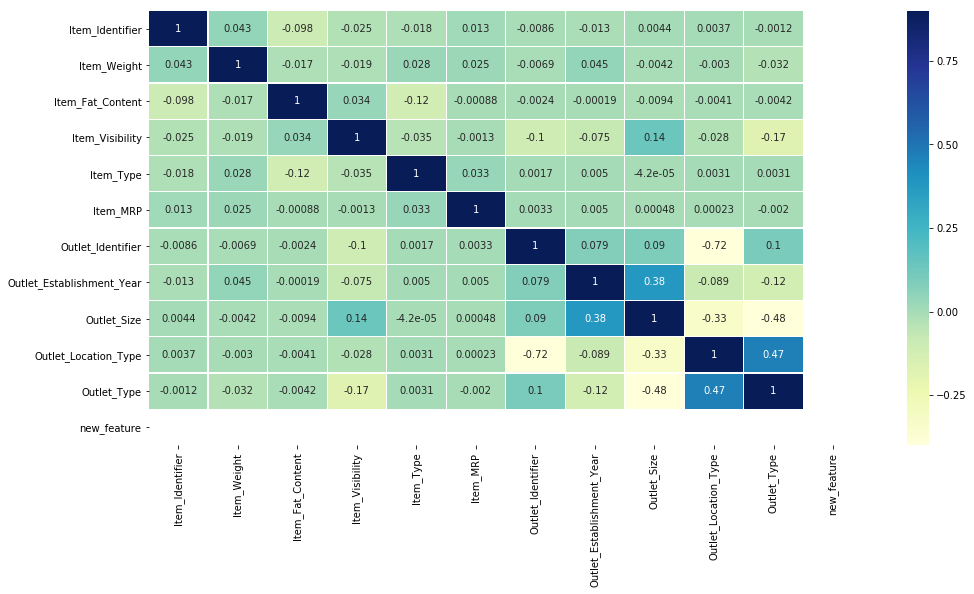

In [151]:
#------Checking correlation---------
corrmatrix = train_data.corr()
plt.subplots(figsize=(16,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [152]:
#-------fit to linear regression-----------------
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(train_data,y)

LinearRegression()

In [153]:
#Reading test data
test_data=pd.read_csv(r"E:\ml_ai_ict\competition\test_AbJTz2l.csv")

In [154]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [155]:
test_data[test_data["Item_Weight"].isnull()]["Item_Type"].unique()

array(['Dairy', 'Baking Goods', 'Health and Hygiene', 'Household',
       'Others', 'Fruits and Vegetables', 'Meat', 'Canned', 'Snack Foods',
       'Starchy Foods', 'Hard Drinks', 'Frozen Foods', 'Soft Drinks',
       'Breads', 'Breakfast', 'Seafood'], dtype=object)

In [156]:
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(12.0)

In [157]:
test_data[test_data["Outlet_Size"].isnull()]["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store'], dtype=object)

In [158]:
trial3=test_data[test_data["Outlet_Size"].isnull()]

In [159]:
groupp=trial3.groupby(["Outlet_Type","Outlet_Location_Type"])

In [160]:
for name,each in groupp:
    print(name)
    print(len(each))
    

('Grocery Store', 'Tier 3')
370
('Supermarket Type1', 'Tier 2')
1236


In [161]:
test_data["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [162]:
indexes2=test_data[(test_data["Outlet_Location_Type"]=='Tier 3') & (test_data["Outlet_Type"]=='Grocery Store')]["Outlet_Size"].index

In [163]:
test_data.loc[indexes2,"Outlet_Size"]="very small"

In [164]:
test_data["Outlet_Size"]= test_data["Outlet_Size"].fillna("Small")

In [165]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [166]:
tindex10=test_data.loc[test_data["Outlet_Identifier"]=="010"].index
tindex19=test_data.loc[test_data["Outlet_Identifier"]=="019"].index
test_data.loc[:,"new_feature"]=1
test_data.loc[tindex10,"new_feature"]=0
test_data.loc[tindex19,"new_feature"]=0

In [167]:
test_data=test_data

In [168]:
cols = test_data.select_dtypes(include=["object"]).columns.tolist()
for col in cols:
    test_data[col]=label.fit_transform(test_data[col])

In [169]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
column_names=test_data.columns
test_data=pd.DataFrame(scale.fit_transform(test_data),columns=column_names)

In [170]:
#output of linear regression
y_predict=regression.predict(test_data)

In [171]:
submission=pd.read_csv(r"E:\ml_ai_ict\competition\sample_submission_8RXa3c6.csv")

In [172]:
submission.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [173]:
submission["Item_Outlet_Sales"]=abs(y_predict)

In [174]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2003.539840
1,FDW14,OUT017,1082.091728
2,NCN55,OUT010,2149.025714
3,FDQ58,OUT017,2072.125743
4,FDY38,OUT027,5013.484374


In [175]:
submission.set_index("Item_Identifier")

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,2003.539840
FDW14,OUT017,1082.091728
NCN55,OUT010,2149.025714
FDQ58,OUT017,2072.125743
FDY38,OUT027,5013.484374
...,...,...
FDB58,OUT046,2322.715447
FDD47,OUT018,3076.716345
NCO17,OUT045,1711.051936


In [180]:
submission.to_csv(r"E:\ml_ai_ict\competition\output.csv")

In [181]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(train_data,y)
y_rand=rand.predict(test_data)

In [182]:
submission["Item_Outlet_Sales"]=abs(y_rand)

In [183]:
submission.to_csv(r"E:\ml_ai_ict\competition\output_rand.csv")